#  Programming Assignment 2
* Author: Shreya Dubey 

In [17]:
# Importing all the required libraries.

import numpy as np
import sklearn
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from numba import jit, cuda

In [2]:
# Using LoadDataModule.py for decompressing the dataset.

from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import math

'''load your data here'''

class LoadDataModule(object):
    def __init__(self):
        self.DIR = './'
        pass
    
    # Returns images and labels corresponding for training and testing. Default mode is train. 
    # For retrieving test data pass mode as 'test' in function call.
    def load(self, mode = 'train'):
        label_filename = mode + '_labels'
        image_filename = mode + '_images'
        label_zip = self.DIR + label_filename + '.zip'
        image_zip = self.DIR + image_filename + '.zip'
        with ZipFile(label_zip, 'r') as lblzip:
            labels = np.frombuffer(lblzip.read(label_filename), dtype=np.uint8, offset=8)
        with ZipFile(image_zip, 'r') as imgzip:
            images = np.frombuffer(imgzip.read(image_filename), dtype=np.uint8, offset=16).reshape(len(labels), 784)
        return images, labels

ld = LoadDataModule()


#Now let's load the dataset
images,labels = ld.load('train')

In [3]:
# Changing the label value to a vector

train_label = np.zeros((images.shape[0],10))
for i in range(len(labels)):
    train_label[i,labels[i]] = 1

# Normalizing the training data

scaler = MinMaxScaler()
images = scaler.fit_transform(images)
    
# Reshaping the training images    

train_images = np.empty((images.shape[0],28,28))
for i in range (images.shape[0]):
    train_images[i,:,:]=(np.reshape(images[i,:],(28,28)))

train_images = train_images.reshape(-1,28,28,1)

C:\Users\khare\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
# Creating the model

model = Sequential()
model.add(Conv2D(48, kernel_size=3, activation='relu', input_shape=(28,28,1), use_bias=True, strides=(1,1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, kernel_size=3, activation='relu', input_shape=(25,25,1), use_bias=True, strides=(1,1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(output_dim=100, activation='relu'))
model.add(Dense(output_dim=10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
  if __name__ == '__main__':
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  # Remove the CWD from sys.path while we load stuff.


In [5]:
# Creating class for wall time 

import time
import keras
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

time_callback = TimeHistory()

history = model.fit(train_images,train_label, epochs=50, batch_size=200, callbacks=[time_callback])

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 54s 898us/step - loss: 0.5667 - acc: 0.7970
Epoch 2/50
60000/60000 [==============================] - 53s 882us/step - loss: 0.3585 - acc: 0.8724
Epoch 3/50
60000/60000 [==============================] - 54s 893us/step - loss: 0.3152 - acc: 0.8868
Epoch 4/50
60000/60000 [==============================] - 53s 883us/step - loss: 0.2861 - acc: 0.8962
Epoch 5/50
60000/60000 [==============================] - 53s 887us/step - loss: 0.2611 - acc: 0.90514s - 
Epoch 6/50
60000/60000 [==============================] - 53s 880us/step - loss: 0.2409 - acc: 0.9125
Epoch 7/50
60000/60000 [==============================] - 53s 882us/step - loss: 0.2237 - acc: 0.9178
Epoch 8/50
60000/60000 [==============================] - 53s 882us/step - loss: 0.2084 - acc: 0.9233
Epoch 9/50
60000/60000 [==============================] - 53s 880us/step - loss: 0.1945 - acc: 0.9293
Epoch 10/50
60000/60000 [====

In [7]:
# Rounding up wall time for graph

time = time_callback.times
wall_time = []
sum = 0
for t in range(len(time)):
    sum = sum+time[t]
    wall_time.append(round(sum))

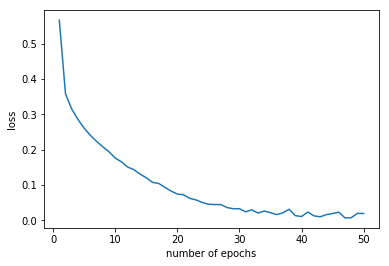

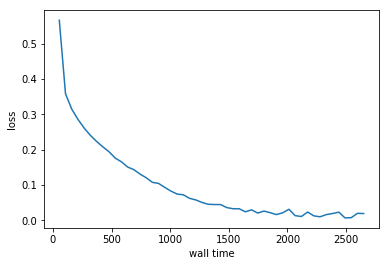

In [8]:
# Plotting graph between loss and epoch 

import matplotlib.pyplot as plt
epoch = np.arange(len(time))
epoch = epoch+1
plt.plot(epoch, history.history['loss'])
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.show()

# Plotting graph between loss and wall time

plt.plot(wall_time, history.history['loss'])
plt.ylabel("loss")
plt.xlabel("wall time")
plt.show()

In [9]:
# Prediction on training data

train_Y_pred = model.predict_classes(train_images)

# Calculating overall accuracy

print("Accuracy = ",metrics.accuracy_score(labels,train_Y_pred)*100)

Accuracy =  99.46166666666667


In [10]:
# Calculation of confusion matrix

cm1 = metrics.confusion_matrix(labels,train_Y_pred,labels=[0,1,2,3,4,5,6,7,8,9])
print("Confusion Matrix = ",cm1)

# Calculating classwise accuracies

cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
print("Classwise accuracy = ",(cm1.diagonal()*100))

Confusion Matrix =  [[5931    0   44    2    2    0   13    0    8    0]
 [   9 5952   13   15    4    0    7    0    0    0]
 [   1    0 5969    0   28    0    2    0    0    0]
 [   2    0    2 5977    5    0   11    0    3    0]
 [   0    0   11    1 5988    0    0    0    0    0]
 [   0    0    0    0    0 6000    0    0    0    0]
 [  21    0   48    1   63    0 5863    0    4    0]
 [   0    0    0    0    0    0    0 5998    1    1]
 [   1    0    0    0    0    0    0    0 5999    0]
 [   0    0    0    0    0    0    0    0    0 6000]]
Classwise accuracy =  [ 98.85        99.2         99.48333333  99.61666667  99.8
 100.          97.71666667  99.96666667  99.98333333 100.        ]


In [11]:
# Calculating classwise Precision, Recall and F1 score

print("Precision = ",metrics.precision_score(labels,train_Y_pred,average=None)*100)
print("Recall = ",metrics.recall_score(labels,train_Y_pred,average=None)*100)
print("F1 score = ",metrics.f1_score(labels,train_Y_pred,average=None)*100)

Precision =  [ 99.43000838 100.          98.06144242  99.68312208  98.32512315
 100.          99.44029851 100.          99.73399834  99.98333611]
Recall =  [ 98.85        99.2         99.48333333  99.61666667  99.8
 100.          97.71666667  99.96666667  99.98333333 100.        ]
F1 score =  [ 99.13915587  99.59839357  98.76727062  99.64988329  99.05707196
 100.          98.57094822  99.98333056  99.8585102   99.99166736]


In [12]:
# Loading test data

test_images,test_labels = ld.load('test')

# Normalizing test data

test_images = scaler.transform(test_images)

# Reshaping the test images for CNN

test_images_new = np.empty((test_images.shape[0],28,28))
for i in range (test_images.shape[0]):
    test_images_new[i,:,:]=(np.reshape(test_images[i,:],(28,28)))

test_images_new = test_images_new.reshape(-1,28,28,1)

In [13]:
# Prediction on test data

test_Y_pred = model.predict_classes(test_images_new)

# Calculating overall accuracy

print("Accuracy = ",metrics.accuracy_score(test_labels,test_Y_pred)*100)

Accuracy =  91.22


In [14]:
# Calculation of confusion matrix

cm2 = metrics.confusion_matrix(test_labels,test_Y_pred,labels=[0,1,2,3,4,5,6,7,8,9])
print("Confusion Matrix = ",cm2)

# Calculation of classwise accuracies

cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
print("Classwise accuracy = ",cm2.diagonal()*100)

Confusion Matrix =  [[860   0  27  12   8   0  84   0   9   0]
 [  7 965   3  12   4   0   7   0   2   0]
 [ 15   0 897   8  47   0  33   0   0   0]
 [ 14   1  13 907  22   0  37   0   6   0]
 [  0   0  54  16 888   0  41   0   1   0]
 [  1   0   0   0   0 976   0  15   0   8]
 [ 87   0  84  17  71   0 724   0  17   0]
 [  0   0   0   0   0  10   0 956   0  34]
 [  5   0   3   4   0   0   3   3 981   1]
 [  1   0   0   0   0   4   0  27   0 968]]
Classwise accuracy =  [86.  96.5 89.7 90.7 88.8 97.6 72.4 95.6 98.1 96.8]


In [15]:
# Calculating classwise Precision, Recall and F1 score

print("Precision = ",metrics.precision_score(test_labels,test_Y_pred,average=None)*100)
print("Recall = ",metrics.recall_score(test_labels,test_Y_pred,average=None)*100)
print("F1 score = ",metrics.f1_score(test_labels,test_Y_pred,average=None)*100)

Precision =  [86.86868687 99.89648033 82.9787234  92.93032787 85.38461538 98.58585859
 77.93326157 95.5044955  96.55511811 95.74678536]
Recall =  [86.  96.5 89.7 90.7 88.8 97.6 72.4 95.6 98.1 96.8]
F1 score =  [86.4321608  98.1688708  86.20855358 91.80161943 87.05882353 98.09045226
 75.06480041 95.55222389 97.32142857 96.27051218]
